In [1]:
#necessary packages
import pandas as pd
import numpy as np

import os
working_directory = os.getcwd()
print(working_directory)


import warnings
warnings.filterwarnings('ignore')

/content


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/My Drive/project'

In [ ]:

path_train = working_directory + '/all_samples /all_train.tsv'
path_test = working_directory + '/all_samples /all_test_public.tsv'
path_validation = working_directory + '/all_samples /all_validate.tsv'


df_train = pd.read_csv(path_train,sep='\t')
df_test = pd.read_csv(path_test,sep='\t')
df_validation = pd.read_csv(path_validation,sep='\t')

In [ ]:
#Loading the comments data.

path_comments = working_directory + '/all_samples /all_comments.tsv'

df_coments = pd.read_csv(path_comments,sep='\t')


Preprocessing:


  Text preprocessing is a technique to tidy up the text data and get it ready to be fed into the model. Text data includes noise in a variety of ways, including sentiments, syntax, and words in different case. There are numerous ways to describe the same thing in human language, but this is the key issue we must solve since machines cannot comprehend words; they want numbers, thus we must effectively translate text into numbers.

In fakeddit dataset, training data have only post-title's and related features but comments for each posts are located in different dataset. So, following functions helps to extract necessary information from both datasets as



1.   preprocessing - each row in "comments" dataset records for each comment on posts and each post may have comments ranging from 0-500 . So, groups the comments based on submission id using "inner-join". Then checks for duplicates and removes them effectively.

2.   clean - In "posts" dataset, clean-title is the feature that we need for model but has some missing values. As clean_title is a version of title, replacing the clean_title's missing values with corresponding values in the title feature. Then check for duplicate values.


3.   cleaning_data - Extracts the necessary coolumns from the datasets namely 'id','clean_title','title','2_way_label','num_comments.

4.   text_clean - Removes the noise such as Url's from the text, numbers and special charecters from the dataset.

    



In [ ]:
def preprocessing(data):
    
    
    #grouping the all comments based on submission id
    comments = data.dropna(subset=['body']).groupby(['submission_id'], as_index = False).agg({'body': ' '.join})

    
    #checking for duplicate values
    duplicates = comments.duplicated().sum()
    
    if (duplicates==0):
        print("No duplicates found")
    else:
        comments = pd.DataFrame.drop_duplicates(comments)
    
    return comments

In [ ]:
def clean(data):
    
    # As clean_title is a version of title, replacing the clean_title's missing values with corresponding values in the title feature.
    
    data['clean_title'] = data['title'].where(data['clean_title'].isna(), data['clean_title'])

    
    #drop unnecessary features

    data = data.drop(data[data.num_comments > 50].index)
    
    clean_data = data[['body','clean_title','2_way_label']]
    return clean_data
    

In [ ]:
def cleaning_data(data):
    
    #checking for duplicate values
    duplicates = data.duplicated().sum()
    
    if (duplicates==0):
        print("No duplicates found")
    else:
        data = pd.DataFrame.drop_duplicates(data)
        
    # Dropping columns
    data = data[['id','clean_title','title','2_way_label','num_comments']]
    return data
    
    

In [ ]:
df_coments =preprocessing(df_coments)
df_coments

No duplicates found


,submission_id,body
0,10012t,"By sheer happenstance, the person who institut..."
1,10024l,Holy Ganges Batman.
2,1002bi,Maybe if they had been swallowing in the first...
3,1005ae,http://i.imgur.com/70m4v.jpg http://i.imgur.co...
4,10076s,[deleted] http://i.imgur.com/wqZDC.jpg http://...
...,...,...
618939,zzqvk,[Swap](http://i.imgur.com/Y3Vx1.jpg) [They're ...
618940,zzt18,[Obligitory face swap.](http://i.imgur.com/Gwu...
618941,zztjs,[My Halloween crop had a wonderful harvest thi...
618942,zzvp9,[inspired by some other sub-reddit](http://i.i...


In [ ]:
import re


spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","\n","^","_",
              "`","{","|","}","~","–"]

def text_clean(data):
    
    #removing Url's from the body text
    data['body'] = data['body'].str.replace(r'https?://\S+','')
    
    # removing numbers from dataframe
    data['body'] = data['body'].str.replace('\d+', '')
    
    #removing special characters from the body
    
    for char in spec_chars:
        data['body'] = data['body'].str.replace(char, '')
        
    return data

In [ ]:
# Merging the train and comments dataset based on "Submission_id" and "id" columns
df_train =cleaning_data(df_train)

df_train = pd.merge(df_coments, df_train, left_on=['submission_id'], right_on = ['id'])

df_train = clean(df_train)

df_train = text_clean(df_train)
print("Shape of Train dataset after merging", df_train.shape)

df_train.head()

No duplicates found
Shape of Train dataset after merging (456890, 3)


,body,clean_title,2_way_label
0,By sheer happenstance the person who institute...,beauty pageant organizers mandate that contest...,1
1,Holy Ganges Batman,morning boat traffic on the holy ganges river,1
2,Maybe if they had been swallowing in the first...,a recent study theorizes that ingesting semen ...,1
3,deleted Fixed Adjusted to the appropriate co...,oddball banana cross post from rmildlyinteresting,1
4,Photoshop MagicHair is difficult She looks pre...,a flying cheerleader now go,1


In [ ]:
# Merging the validation and comments dataset based on "Submission_id" and "id" columns

df_validation = cleaning_data(df_validation)

df_validation = pd.merge(df_coments, df_validation, left_on=['submission_id'], right_on = ['id'])


df_validation = clean(df_validation)

df_validation = text_clean(df_validation)
print("Shape of Validation dataset after merging", df_validation.shape)

df_validation.head()

No duplicates found
Shape of Validation dataset after merging (47908, 3)


,body,clean_title,2_way_label
0,I stab people four five people a dayAlso wr...,be thankful this doesnt happen in your town,1
1,Crazy lady Somehow this passed under my radar...,jubilant pepper is jubilant,0
2,I did some facebombing I had amyotrophic later...,drunk guy at party shows potential,1
3,If you get caught by your boss watching it its...,some say nsfw i say its a carrot,0
5,I would gladly do this actually I mean now tha...,maker of puzzle finds few wanting to try it ws...,1


In [ ]:
# Merging the test and comments dataset based on "Submission_id" and "id" columns

df_test = cleaning_data(df_test)

df_test = pd.merge(df_coments, df_test, left_on=['submission_id'], right_on = ['id'])

df_test = clean(df_test)

df_test = text_clean(df_test)
print("Shape of Test dataset after merging", df_test.shape)

df_test.head()


No duplicates found
Shape of Test dataset after merging (48204, 3)


,body,clean_title,2_way_label
0,I give up I need to know What is this and what...,my god its full of,0
1,Apparently the billionaire has produced cans ...,starting today canned air is on sale in china ...,1
2,Hey man Did you just hear something The real T...,backflip off the bow of a speedboat,1
3,Clearly the affected parties need to take a di...,no entry for hipsters berliners unhappy with t...,1
4,Read the title and though oh well thats probab...,young persons called to private grand jury for...,1


Class Distribution - Plot the distribution of target variable on the training dataset which shows class imabalance with true news as the minority class. 

No of fake  news records is 68.64% of the training set.

No of true news records is 31.36% of the training set.

313628 of 456890 No of fake  news records and it is the 68.64% of the training set.
143262 of 456890  No of true news records and it is the 31.36% of the training set.


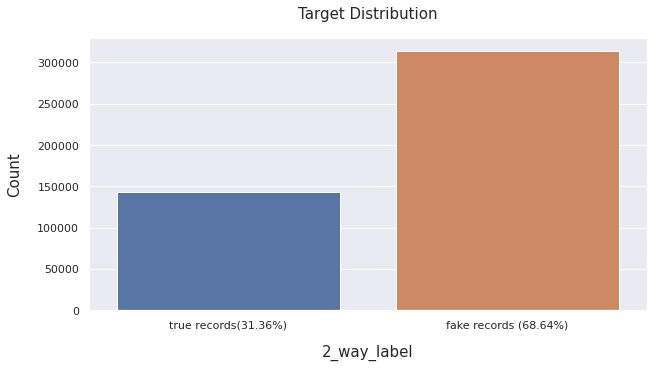

In [ ]:
# Plotting the distribution of target variable
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fake = df_train['2_way_label'].value_counts()[1]
true = df_train['2_way_label'].value_counts()[0]
fake_per = fake / df_train.shape[0] * 100
true_per = true / df_train.shape[0] * 100

print('{} of {} No of fake  news records and it is the {:.2f}% of the training set.'.format(fake, df_train.shape[0], fake_per))
print('{} of {}  No of true news records and it is the {:.2f}% of the training set.'.format(true, df_train.shape[0], true_per))

plt.figure(figsize=(10, 5))
sns.countplot(df_train['2_way_label'])


plt.xlabel('2_way_label', size=15, labelpad=15)
plt.ylabel('Count', size=15, labelpad=15)
plt.xticks((0, 1), ['true records({0:.2f}%)'.format(true_per), 'fake records ({0:.2f}%)'.format(fake_per)])

plt.title('Target Distribution', size=15, y=1.05)

plt.show()

Removing data -

As the training data set alone has 456890 records and each record containing posts title and comments. So, to mmake data computationaly effective droping limited rows by random selection from train, validation and test datasets.

In [ ]:
# Randomly droping few rows from true records

def remove(data,n,m):
    np.random.seed(10)

    df_true = data[data['2_way_label']==0]

    df_fake = data[data['2_way_label']==1]
     
    drop_indices_true = np.random.choice(df_true.index, m, replace=False)
    df_subset_true = df_true.drop(drop_indices_true)
    
    drop_indices_fake = np.random.choice(df_fake.index, n, replace=False)
    df_subset_fake = df_fake.drop(drop_indices_fake)
    
   
    
    df_train_new = pd.concat([df_subset_true, df_subset_fake],ignore_index=True)
    
    return df_train_new

In [ ]:
# Randomly droping few rows from true records


df_train_new  = remove(df_train, 291000, 110000 )

df_validation_new  = remove(df_validation, 32000, 13000 )

df_test_new  = remove(df_test, 32000, 13000 )


In [ ]:
df_train_new['2_way_label'].value_counts()

0    33262
1    22628
Name: 2_way_label, dtype: int64

In [ ]:
df_test_new['2_way_label'].value_counts()

0    1971
1    1233
Name: 2_way_label, dtype: int64

Class Distribution on final data of training data. 

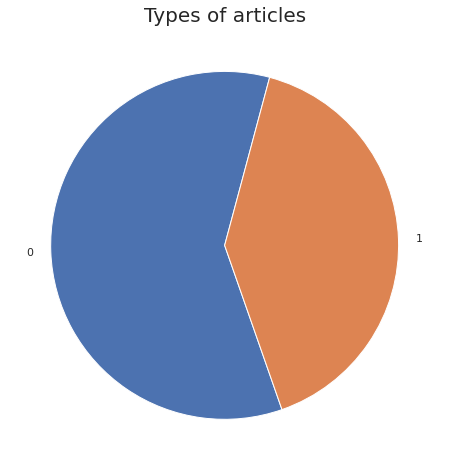

In [ ]:
#Distrubution of classes 

df_train_new['2_way_label'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:

#pickle the dataframe for later use

import pickle


df_train_new.to_pickle("./drive/MyDrive/project/df_train.pkl")

df_validation_new.to_pickle("./drive/MyDrive/project/df_validation.pkl")

df_test_new.to_pickle("./drive/MyDrive/project/df_test.pkl")